In [18]:
from keras.datasets import reuters
import numpy as np

from keras import models
from keras import layers

import matplotlib.pyplot as plt
import copy

In [2]:
(train_x, train_y), (test_x, test_y) = reuters.load_data(num_words=10000)

### Decode newswire back to text

In [3]:
word_index = reuters.get_word_index()

In [4]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_x[0]])

In [5]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

### Preprocess the data

In [6]:
def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i , sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [7]:
train_x = vectorize_sequence(train_x)
test_x = vectorize_sequence(test_x)

In [8]:
def to_on_hot(labels, dimesions=46):
    results = np.zeros((len(labels), dimesions))
    for i, label in enumerate(labels):
        results[i, label]= 1
    return results

In [9]:
train_y = to_on_hot(train_y)
test_y = to_on_hot(test_y)

### Initialize the model

In [10]:
def init(dimension):
    model = models.Sequential()
    model.add(layers.Dense(dimension, activation = 'relu', input_shape=(10000,)))
    model.add(layers.Dense(dimension, activation = 'relu'))
    model.add(layers.Dense(46, activation= 'softmax'))
    return model
    
model = init(dimension=64)

In [11]:
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

### Setting aside validation set

In [12]:
x_val = train_x[:1000]
x_train_part = train_x[1000:]

y_val = train_y[:1000]
y_train_part = train_y[1000:]

In [13]:
y_train_part.shape

(7982, 46)

In [14]:
history = model.fit(x_train_part,y_train_part,
                   epochs = 8,
                   batch_size= 512,
                   validation_data = (x_val,y_val))

Epoch 1/8
16/16 [==============================] - 0s 28ms/step - loss: 2.4957 - accuracy: 0.5251 - val_loss: 1.6403 - val_accuracy: 0.6550
Epoch 2/8
16/16 [==============================] - 0s 17ms/step - loss: 1.3730 - accuracy: 0.7144 - val_loss: 1.2770 - val_accuracy: 0.7130
Epoch 3/8
16/16 [==============================] - 0s 17ms/step - loss: 1.0298 - accuracy: 0.7795 - val_loss: 1.1269 - val_accuracy: 0.7560
Epoch 4/8
16/16 [==============================] - 0s 18ms/step - loss: 0.8044 - accuracy: 0.8271 - val_loss: 1.0443 - val_accuracy: 0.7680
Epoch 5/8
16/16 [==============================] - 0s 17ms/step - loss: 0.6360 - accuracy: 0.8646 - val_loss: 0.9896 - val_accuracy: 0.7900
Epoch 6/8
16/16 [==============================] - 0s 18ms/step - loss: 0.5073 - accuracy: 0.8931 - val_loss: 0.9475 - val_accuracy: 0.7960
Epoch 7/8
16/16 [==============================] - 0s 17ms/step - loss: 0.4085 - accuracy: 0.9173 - val_loss: 0.9248 - val_accuracy: 0.8040
Epoch 8/8
16/16 [===

In [15]:
def plot_loss_accuracy(history):
    fig, (ax1, ax2) = plt.subplots(2, figsize=(8,8))
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']
    
    epochs = range(1, len(train_loss)+1)
    
    ax1.plot(epochs, train_loss, 'ro', label='Train loss')
    ax1.plot(epochs, val_loss, 'b', label='Validation loss')
    ax1.set_title('Training and validation loss')
    ax1.legend()
    
    ax2.plot(epochs, train_acc, 'ro', label='Train accuracy')
    ax2.plot(epochs, val_acc, 'b', label='Test accuracy')
    ax2.set_title('Training and validation accuracy')
    ax2.set_xlabel('Epochs')
    ax2.legend()
    

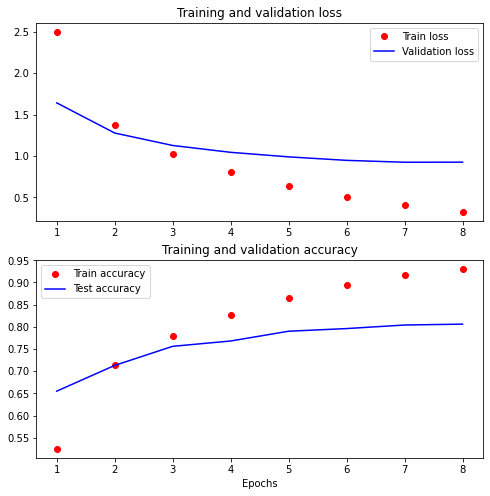

In [16]:
plot_loss_accuracy(history.history)

In [17]:
result= model.evaluate(test_x, test_y)
result

71/71 [==============================] - 0s 1ms/step - loss: 0.9924 - accuracy: 0.7881


[0.9923810958862305, 0.7880676984786987]

### Prediction

In [22]:
pred = model.predict(test_x)

In [26]:
np.argmax(pred[0])

3